# Deep Neural Network Application - Classification of Breast Cancer

This notebook is an application example of the functions in `nn_functions.py` (implementation of Deep Neural Network for binary classification).

In this case I'm going to use the **Breast Cancer Wisconsin Dataset** from [UCI Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) also available directly in **scikit-learn**.

## 1. Import Packages

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn_functions import *

## 2. Dataset Exploration

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print(df.shape)
print(df.columns)
print('---------------------------------')
print(data.target.shape)
print(data.target)

(569, 30)
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
---------------------------------
(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 

* The dataset consists on 569 rows of patient's data and 30 columns of features that describe various characteristics of the cell nuclei present in a digitized image of a fine needle aspirate (FNA) of a breast mass.

    * These features are computed from the images and are used to help predict whether the tumor is **benign (non-cancerous)** or **malignant (cancerous)**.

* The diagnosis is contained in the **target** variable: **0 = malignant**  |   **1 = bening**

In [4]:
print(df.info())
print('----------------------------------------')
print(df.describe())
print('----------------------------------------')
print('Number bening:', np.count_nonzero(data.target))
print('Number malignant:', 569 - np.count_nonzero(data.target))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

* Here are some statistics about each feature, their data type is floating number so the features are all continuous variables.

    * The features are not standarized, so it will need to be handled for the correct performance of the Neural Network.

* The dataset contains 357 entries for tumors that were bening and 212 for tumors that were malignant.

    * Stratification could be implemented to deal with the class imbalance (more bening cases than malignant).


# 3. Neural Network Application

### 3.1 Data Processing

In [5]:
from sklearn.model_selection import train_test_split

X = data.data 
Y = data.target  

# Standarization of the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=42)

# Reshape
X_train = X_train.T # Shape: (features, samples)
X_test = X_test.T
y_train = y_train.reshape(1, -1)    # Shape: (1, samples)
y_test = y_test.reshape(1, -1)

### 3.2 L-Layer Neural Network Architecture

Here I will integrate the functions of `nn_functions.py` in a sole function to compute the forward and backpropagation in 1 command.

I also added 2 functions: to plot the cost and to obtain predictions and accuracy for training and testing.

In [15]:
# Layers dimensions
layers_dims = [30, 32, 16, 1] # the input layer is 1 neuron * feature (30 features)

def L_layer_model(X, Y, layers_dims, learning_rate = 0.05, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (features, number of examples)
    Y -- true "label" vector (containing 1 if bening, 0 if malignant), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []        # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = forward_prop(X, parameters)

        # Compute cost.
        cost = cost_function(AL, Y)

        # Backward propagation.
        grads = backward_prop(AL, Y, caches)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 iterations and for the last iteration
        if print_cost and (i % 100 == 0 or i == num_iterations - 1):
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
    
    return parameters, costs

# Function that plots the cost per iteration:
def plot_costs(costs, learning_rate=0.05):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

# Function that performs the forward propagation with the final parameters to get predictions and computes accuracy:
def predict(X, Y, parameters):
    """
    Predict using the learned parameters and return accuracy.
    """
    # Forward propagation
    AL, _ = forward_prop(X, parameters)
    
    # Convert probabilities to binary predictions (0/1)
    predictions = (AL > 0.5).astype(int)
    
    # Compute accuracy
    accuracy = np.mean(predictions == Y) * 100

    return predictions, accuracy

# 3.3 Training and testing

* **Training**:

Cost after iteration 0: 0.6931608090556479
Cost after iteration 100: 0.6634573543770073
Cost after iteration 200: 0.6608903011363616
Cost after iteration 300: 0.6606341614342605
Cost after iteration 400: 0.6605699349609548
Cost after iteration 500: 0.6604780981377949
Cost after iteration 600: 0.6602610119517733
Cost after iteration 700: 0.6596327656625369
Cost after iteration 800: 0.6571400919972393
Cost after iteration 900: 0.6383409212961242
Cost after iteration 1000: 0.278132628351217
Cost after iteration 1100: 0.0942295745772423
Cost after iteration 1200: 0.06708145090334167
Cost after iteration 1300: 0.05813592791674871
Cost after iteration 1400: 0.05288648792562288
Cost after iteration 1500: 0.04932207786166705
Cost after iteration 1600: 0.04652094706569382
Cost after iteration 1700: 0.044207373982320386
Cost after iteration 1800: 0.04220136863955379
Cost after iteration 1900: 0.04035826546544983
Cost after iteration 2000: 0.03844633066900453
Cost after iteration 2100: 0.03631958

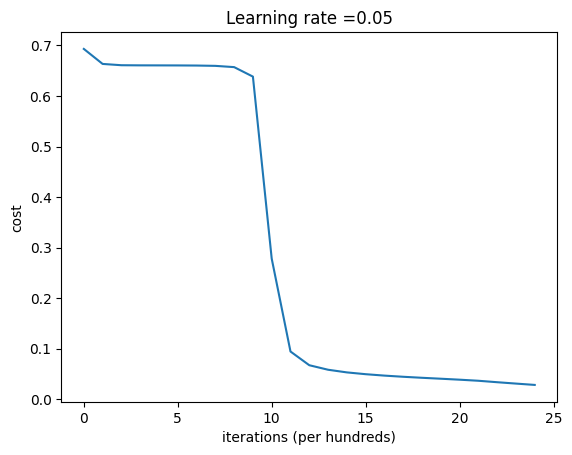

Training accuracy: 99.06%


In [19]:
parameters, costs = L_layer_model(X_train, y_train, layers_dims, num_iterations=2500, print_cost = True)
print('------------------------------------------------')
plot_costs(costs, learning_rate=0.05)
pred_train, accuracy_train = predict(X_train, y_train, parameters)
print(f"Training accuracy: {accuracy_train:.2f}%")

In [17]:
predictions_test, accuracy_test = predict(X_test, y_test, parameters)
print(f"Test accuracy: {accuracy_test:.2f}%")

Test accuracy: 96.50%
